<a href="https://colab.research.google.com/github/Sara-Dastpak/Neural-Network-Assignments/blob/main/HW4/LSTM-Power-Consumption-Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import zipfile
import os

# بارگذاری فایل زیپ از سیستم محلی
uploaded = files.upload()

zip_filename = list(uploaded.keys())[0]
extract_folder = '/content/extracted_data/'

# استخراج فایل
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

extracted_files = os.listdir(extract_folder)
print("Extracted files:", extracted_files)


Saving HouseholdElectricPowerConsumption.zip to HouseholdElectricPowerConsumption.zip
Extracted files: ['household_power_consumption.txt']


In [ ]:
import pandas as pd

file_path = os.path.join(extract_folder, 'household_power_consumption.txt')

# خواندن داده‌ها
data = pd.read_csv(file_path, sep=';', low_memory=False, parse_dates=[[0, 1]], infer_datetime_format=True,
                   na_values=['?'], index_col=0)

print(data.head())


<ipython-input-4-c58a1f58b4fd>:6: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  data = pd.read_csv(file_path, sep=';', low_memory=False, parse_dates=[[0, 1]], infer_datetime_format=True,
<ipython-input-4-c58a1f58b4fd>:6: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data = pd.read_csv(file_path, sep=';', low_memory=False, parse_dates=[[0, 1]], infer_datetime_format=True,


                     Global_active_power  Global_reactive_power  Voltage  \
Date_Time                                                                  
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
Date_Time                                                               
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00          

<ipython-input-4-c58a1f58b4fd>:6: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv(file_path, sep=';', low_memory=False, parse_dates=[[0, 1]], infer_datetime_format=True,


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

data = data[['Global_active_power']]

# نرمال‌سازی داده‌ها به بازه [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60

X, y = create_dataset(data_scaled, time_step)

X = X.reshape(X.shape[0], X.shape[1], 1)

train_size = int(len(X) * 0.8)
# استفاده از یک زیرمجموعه از داده‌ها
X_train, y_train = X_train[:1000], y_train[:1000]
X_test, y_test = X_test[:300], y_test[:300]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# ساخت مدل LSTM
model = Sequential()
model.add(LSTM(units=30, return_sequences=False, input_shape=(time_step, 1)))
model.add(Dense(units=1))

# کامپایل مدل
model.compile(optimizer='adam', loss='mean_squared_error')

# آموزش مدل
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0248 - val_loss: 0.0026
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0081 - val_loss: 0.0019
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0069 - val_loss: 0.0016
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - val_loss: 0.0011
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - val_loss: 0.0013
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - val_loss: 0.0010
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0063 - val_loss: 9.2385e-04
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - val_loss: 9.6761e-04
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - val_loss: 0.0012
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - val_loss: 8.6386e-04


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Mean Absolute Error (MAE): 0.25343726773103076
Mean Squared Error (MSE): 0.10540269018302181


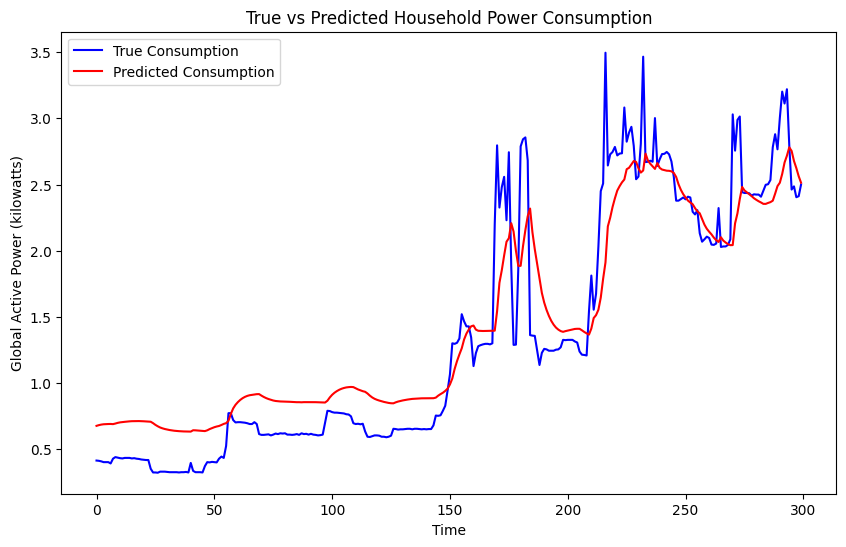

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# پیش‌بینی روی داده‌های تست
y_pred = model.predict(X_test)

# بازگرداندن داده‌های پیش‌بینی‌شده به مقیاس اصلی
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# محاسبه MAE و MSE
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

# نمایش نتایج پیش‌بینی
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, color='blue', label='True Consumption')
plt.plot(y_pred_rescaled, color='red', label='Predicted Consumption')
plt.title('True vs Predicted Household Power Consumption')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kilowatts)')
plt.legend()
plt.show()
